# Week 3 Tutorial

### Setup

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
# Minimum Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

if not cv.useOptimized():
 cv.setUseOptimized(True)

cv.useOptimized()

True

In [11]:
def show_img(window_name, img):
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Exercise 1

In [4]:
img = cv.imread("images/dog.jfif")

if img is None:
    sys.exit("No such filepath!")
   
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF # receive correct input no matter the num lock is on or not
if k == ord('s'):
    cv.imwrite("dog.png", img)
    
cv.destroyAllWindows()

### Exercise 2

In [5]:
# 1st Way
img = cv.imread("images/dog.jfif")
img_grayscale = cv.imread("images/dog.jfif", 0)
# 0 is for grayscale, -1: cv.IMREAD_UNCHANGED, 1 (default)

cv.imshow("dog_color", img)
cv.imshow("dog_grayscale", img_grayscale)
cv.waitKey(0)  # keyboard binding function, wait for user's response
cv.destroyAllWindows()

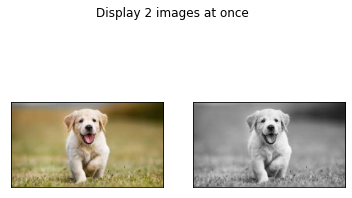

In [6]:
# 2nd Way
import matplotlib.pyplot as plt

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.xticks([]),plt.yticks([])
plt.suptitle("Display 2 images at once")
plt.show()

In [12]:
# 3 Way
img_gray_bgr = cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack([img, img_gray_bgr])

show_img("img_combines", img_combined)

### Exercise 3

In [14]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("No video file found")
    
#cv.namedWindow("frame", cv.WINDOW_NORMAL)

new_height = 600
new_width = 400
fps = 30
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
out = cv.VideoWriter('smaller_img_pexels.avi',fourcc,fps, (new_width, new_height))

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    resize_frame = cv.resize(frame, (new_width,new_height)) 
    
    cv.imshow("resized video", resize_frame)
    if cv.waitKey(1) & 0xFF == 27:
        break
        
    out.write(resize_frame)
    
cap.release()
out.release()
cv.destroyAllWindows()

No frame received!


### Exercise 4

In [15]:
# linear interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_LINEAR)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)

In [16]:
# cubic interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_CUBIC)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)

In [17]:
# nearest neighbour interpolation
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

img_enlarge = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_NEAREST)

cv.imshow("original", img)
show_img("enlarge", img_enlarge)